In [1]:
from texascovid19 import data, constants
import matplotlib.pyplot as plt
import pandas as pd

note, the accounting changed on 3/25.  From the dashboard:

### Why did the case counts reported by DSHS increase suddenly?
 
DSHS updated the method of reporting COVID-19 cases in Texas to provide the public with more timely information. The DSHS daily case count now includes all cases reported publicly by local health departments around the state. With the change, Texas is now reporting an additional 305 cases of COVID-19.
 
The case counts do not include people who were repatriated from China or a cruise ship on U.S. government flights to JBSA-Lackland in San Antonio.
 
 
### Why are these case counts different from what other sources are reporting?
 
Other dashboards may be using media reports to gather information about new cases, which may result in some cases being counted more than once.

In [2]:
START_DATE = '2020-03-25'

# Top N counties

In [3]:
TOP_N = 6

In [4]:
df_timeseries = data.get_timeseries(start_date=START_DATE)

In [5]:
last_date = df_timeseries.columns[-1]

In [6]:
df_ordered = df_timeseries.sort_values(last_date, ascending=False)

In [7]:
# x = df_timeseries.columns.tolist()

In [8]:
TOP_N_COUNTIES = df_ordered.index.tolist()[:TOP_N]

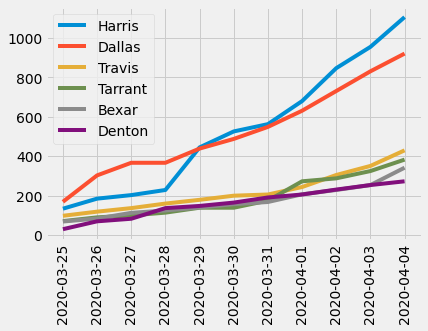

In [9]:
plt.style.use('fivethirtyeight')
for county in TOP_N_COUNTIES:
    if county == "Pending County Assignment":
        continue
    line = plt.plot(df_timeseries.columns, df_timeseries.loc[county], label=county)
    color = line[0].get_color()
#     plt.text(x[-1], df_timeseries.loc[county][-1], county, color=color)
    plt.xticks(rotation=90)

    plt.legend(loc='best')


# By metro area

In [10]:
df_metro = data.get_timeseries(agg_metro=True, start_date=START_DATE).drop('Other')

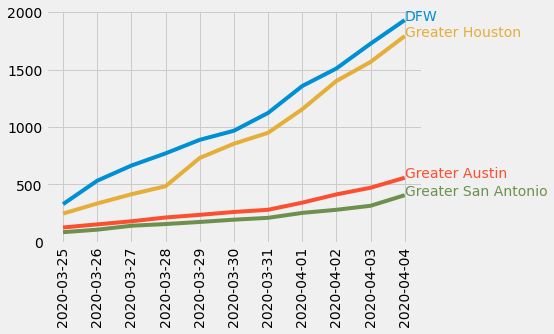

In [11]:
last_cnt = set()
for metro in df_metro.index:
    line = plt.plot(df_metro.columns, df_metro.loc[metro], label=metro)
    color = line[0].get_color()
    plt.text(df_metro.columns[-1], df_metro.loc[metro][-1], metro, color=color)
    plt.xticks(rotation=90)

# Per capita

In [12]:
df_metro_per_capita = df_metro.copy()

In [13]:
df_metro_per_capita.loc['DFW'] = df_metro_per_capita.loc['DFW'] * 1_000_000 / constants.POPULATION_DFW_2018_EST

In [14]:
df_metro_per_capita.loc['Greater Houston'] = df_metro_per_capita.loc['Greater Houston'] * 1_000_000 / constants.POPULATION_GREATER_HOUSTON_2018_EST

In [15]:
df_metro_per_capita.loc['Greater Austin'] = df_metro_per_capita.loc['Greater Austin'] * 1_000_000 / constants.POPULATION_GREATER_AUSTIN_2018_EST

In [16]:
df_metro_per_capita.loc['Greater San Antonio'] = df_metro_per_capita.loc['Greater San Antonio'] * 1_000_000 / constants.POPULATION_GREATER_SAN_ANTONIO_2018_EST

In [17]:
df_metro_per_capita

,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
DFW,42.650466,69.176976,86.341188,100.124571,115.468336,125.740857,145.895803,176.323270,196.218152,224.305044,250.961586
Greater Austin,57.648424,70.100484,82.552543,97.771727,108.379037,119.908722,128.671282,157.264901,190.470393,217.219261,257.342564
Greater Houston,35.155995,47.732124,59.164968,69.168706,104.324702,122.045610,135.622112,164.918775,200.074771,223.797922,255.952796
Greater San Antonio,33.359332,42.096300,55.598887,61.555911,68.704339,76.647038,83.001196,100.077997,110.800640,124.700362,161.236773


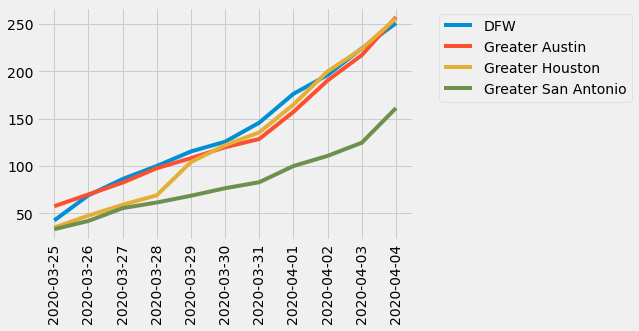

In [18]:
for metro in df_metro.index:
    line = plt.plot(df_metro.columns, df_metro_per_capita.loc[metro], label=metro)
    color = line[0].get_color()
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=90)



# Daily new cases

In [19]:
df_metro_daily = df_metro - df_metro.shift(axis=1)

In [20]:
df_metro_daily

,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
DFW,NaN,204.0,132.0,106.0,118.0,79.0,155.0,234.0,153.0,216.0,205.0
Greater Austin,NaN,27.0,27.0,33.0,23.0,25.0,19.0,62.0,72.0,58.0,87.0
Greater Houston,NaN,88.0,80.0,70.0,246.0,124.0,95.0,205.0,246.0,166.0,225.0
Greater San Antonio,NaN,22.0,34.0,15.0,18.0,20.0,16.0,43.0,27.0,35.0,92.0


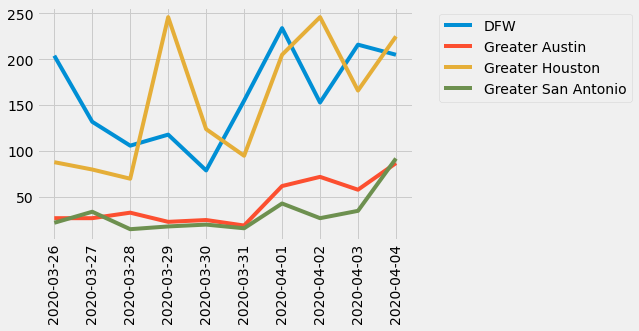

In [21]:
for metro in df_metro_daily.index:
    line = plt.plot(df_metro_daily.columns, df_metro_daily.loc[metro], label=metro)
    color = line[0].get_color()
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=90)



# Growth rates


In [22]:
RATE_WINDOW = 4 # days

In [23]:
df_metro_avg_windowed = df_metro_daily.rolling(RATE_WINDOW, axis=1).mean()

In [24]:
df_metro_avg_windowed

,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
DFW,NaN,NaN,NaN,NaN,140.00,108.75,114.50,146.50,155.25,189.50,202.00
Greater Austin,NaN,NaN,NaN,NaN,27.50,27.00,25.00,32.25,44.50,52.75,69.75
Greater Houston,NaN,NaN,NaN,NaN,121.00,130.00,133.75,167.50,167.50,178.00,210.50
Greater San Antonio,NaN,NaN,NaN,NaN,22.25,21.75,17.25,24.25,26.50,30.25,49.25


In [25]:
df_metro_growth_rates =(100 * (df_metro_avg_windowed - df_metro_avg_windowed.shift(axis=1) )/ df_metro_avg_windowed)

In [26]:
df_metro_growth_rates

,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
DFW,NaN,NaN,NaN,NaN,NaN,-28.735632,5.021834,21.843003,5.636071,18.073879,6.188119
Greater Austin,NaN,NaN,NaN,NaN,NaN,-1.851852,-8.000000,22.480620,27.528090,15.639810,24.372760
Greater Houston,NaN,NaN,NaN,NaN,NaN,6.923077,2.803738,20.149254,0.000000,5.898876,15.439430
Greater San Antonio,NaN,NaN,NaN,NaN,NaN,-2.298851,-26.086957,28.865979,8.490566,12.396694,38.578680


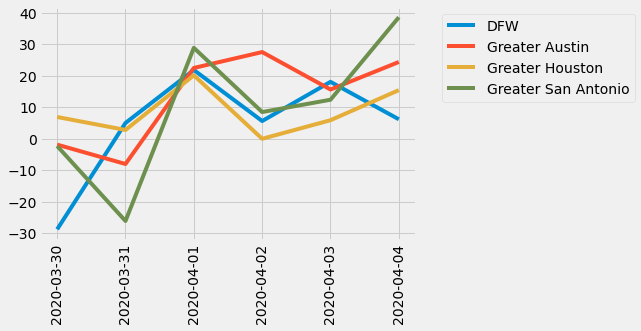

In [27]:
for metro in df_metro_growth_rates.index:
    line = plt.plot(df_metro_growth_rates.columns, df_metro_growth_rates.loc[metro], label=metro)
    color = line[0].get_color()
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=90)





# Williamson county

# cases by city

In [28]:
df_wilco_timeseries = data.get_county_timeseries("wilco")

In [29]:
df_wilco_timeseries

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
City of Residence,,,,,,,,
Austin,5.0,5.0,6,9.0,9.0,9.0,9.0,9
Cedar Park,7.0,7.0,7,8.0,7.0,9.0,9.0,11
Georgetown,9.0,9.0,9,9.0,10.0,10.0,10.0,10
Hutto,1.0,1.0,1,4.0,5.0,5.0,6.0,6
Leander,6.0,6.0,6,7.0,7.0,9.0,10.0,10
Round Rock,9.0,9.0,12,13.0,17.0,21.0,26.0,29
Other,NaN,NaN,1,NaN,NaN,NaN,NaN,1


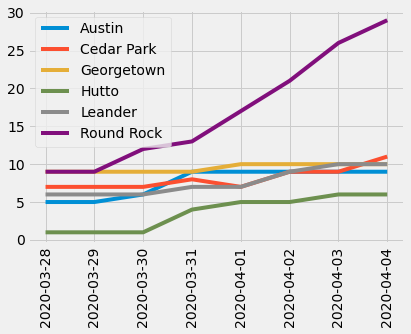

In [30]:
for city in df_wilco_timeseries.index:
    if city == "Other":
        continue
    line = plt.plot(df_wilco_timeseries.columns, df_wilco_timeseries.loc[city], label=city)
    color = line[0].get_color()
#     plt.text(x[-1], df_wilco_timeseries.loc[city][-1], city, color=color)
    plt.xticks(rotation=90)

    plt.legend(loc='best')



# TODO:

1. compare to other large metro areas outside of Texas (https://en.wikipedia.org/wiki/List_of_metropolitan_statistical_areas)
